In [1]:
%autoreload 2

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy import stats
import json
from collections import defaultdict, Counter, namedtuple
from itertools import combinations
from tabulate import tabulate
import sys
import os
import json
import editdistance

PROJECT_PATH = '/Users/guydavidson/projects/game-generation-modeling'
sys.path.append(PROJECT_PATH)

from src.room_and_object_types import *

In [3]:
d = {x: mpl.rcParams[x] for x in mpl.rcParams.keys() if x.startswith('text')}
d

{'text.antialiased': True,
 'text.color': 'black',
 'text.hinting': 'force_autohint',
 'text.hinting_factor': 8,
 'text.kerning_factor': 0,
 'text.latex.preamble': '',
 'text.parse_math': True,
 'text.usetex': False}

In [4]:
FIGURE_TEMPLATE = r'''\begin{{figure}}[!htb]
% \vspace{{-0.225in}}
\centering
\includegraphics[width=\linewidth]{{figures/{save_path}}}
\caption{{ {{\bf FIGURE TITLE.}} FIGURE DESCRIPTION.}}
\label{{fig:{label_name}}}
% \vspace{{-0.2in}}
\end{{figure}}
'''
WRAPFIGURE_TEMPLATE = r'''\begin{{wrapfigure}}{{r}}{{0.5\linewidth}}
\vspace{{-.3in}}
\begin{{spacing}}{{1.0}}
\centering
\includegraphics[width=0.95\linewidth]{{figures/{save_path}}}
\caption{{ {{\bf FIGURE TITLE.}} FIGURE DESCRIPTION.}}
\label{{fig:{label_name}}}
\end{{spacing}}
% \vspace{{-.25in}}
\end{{wrapfigure}}'''

SAVE_PATH_PREFIX = '../figures'


def save_plot(save_path, bbox_inches='tight', should_print=False):
    if save_path is not None:
        save_path_no_ext = os.path.splitext(save_path)[0]
        if should_print:
            print('Figure:\n')
            print(FIGURE_TEMPLATE.format(save_path=save_path, label_name=save_path_no_ext.replace('/', '-').replace('_', '-')))
            print('\nWrapfigure:\n')
            print(WRAPFIGURE_TEMPLATE.format(save_path=save_path, label_name=save_path_no_ext.replace('/', '-').replace('_', '-')))
            print('')
        
        if not save_path.startswith(SAVE_PATH_PREFIX):
            save_path = os.path.join(SAVE_PATH_PREFIX, save_path)
        
        save_path = os.path.abspath(save_path)
        folder, filename = os.path.split(save_path)
        os.makedirs(folder, exist_ok=True)
        plt.savefig(save_path, bbox_inches=bbox_inches, facecolor=plt.gcf().get_facecolor(), edgecolor='none')


## Do the thing

In [6]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal, Covariance


In [8]:
def make_multivarate_normal(xy, mean, cov=1.0, scale_to=None):
    if isinstance(cov, float):
        cov = Covariance.from_diagonal([cov, cov])

    else:
        cov = np.array(cov)
        if len(cov.shape) == 1:
            cov = Covariance.from_diagonal(cov)

    out = multivariate_normal(mean, cov).pdf(xy)  # type: ignore
    if scale_to is not None:
        out = out / out.max() * scale_to

    return out

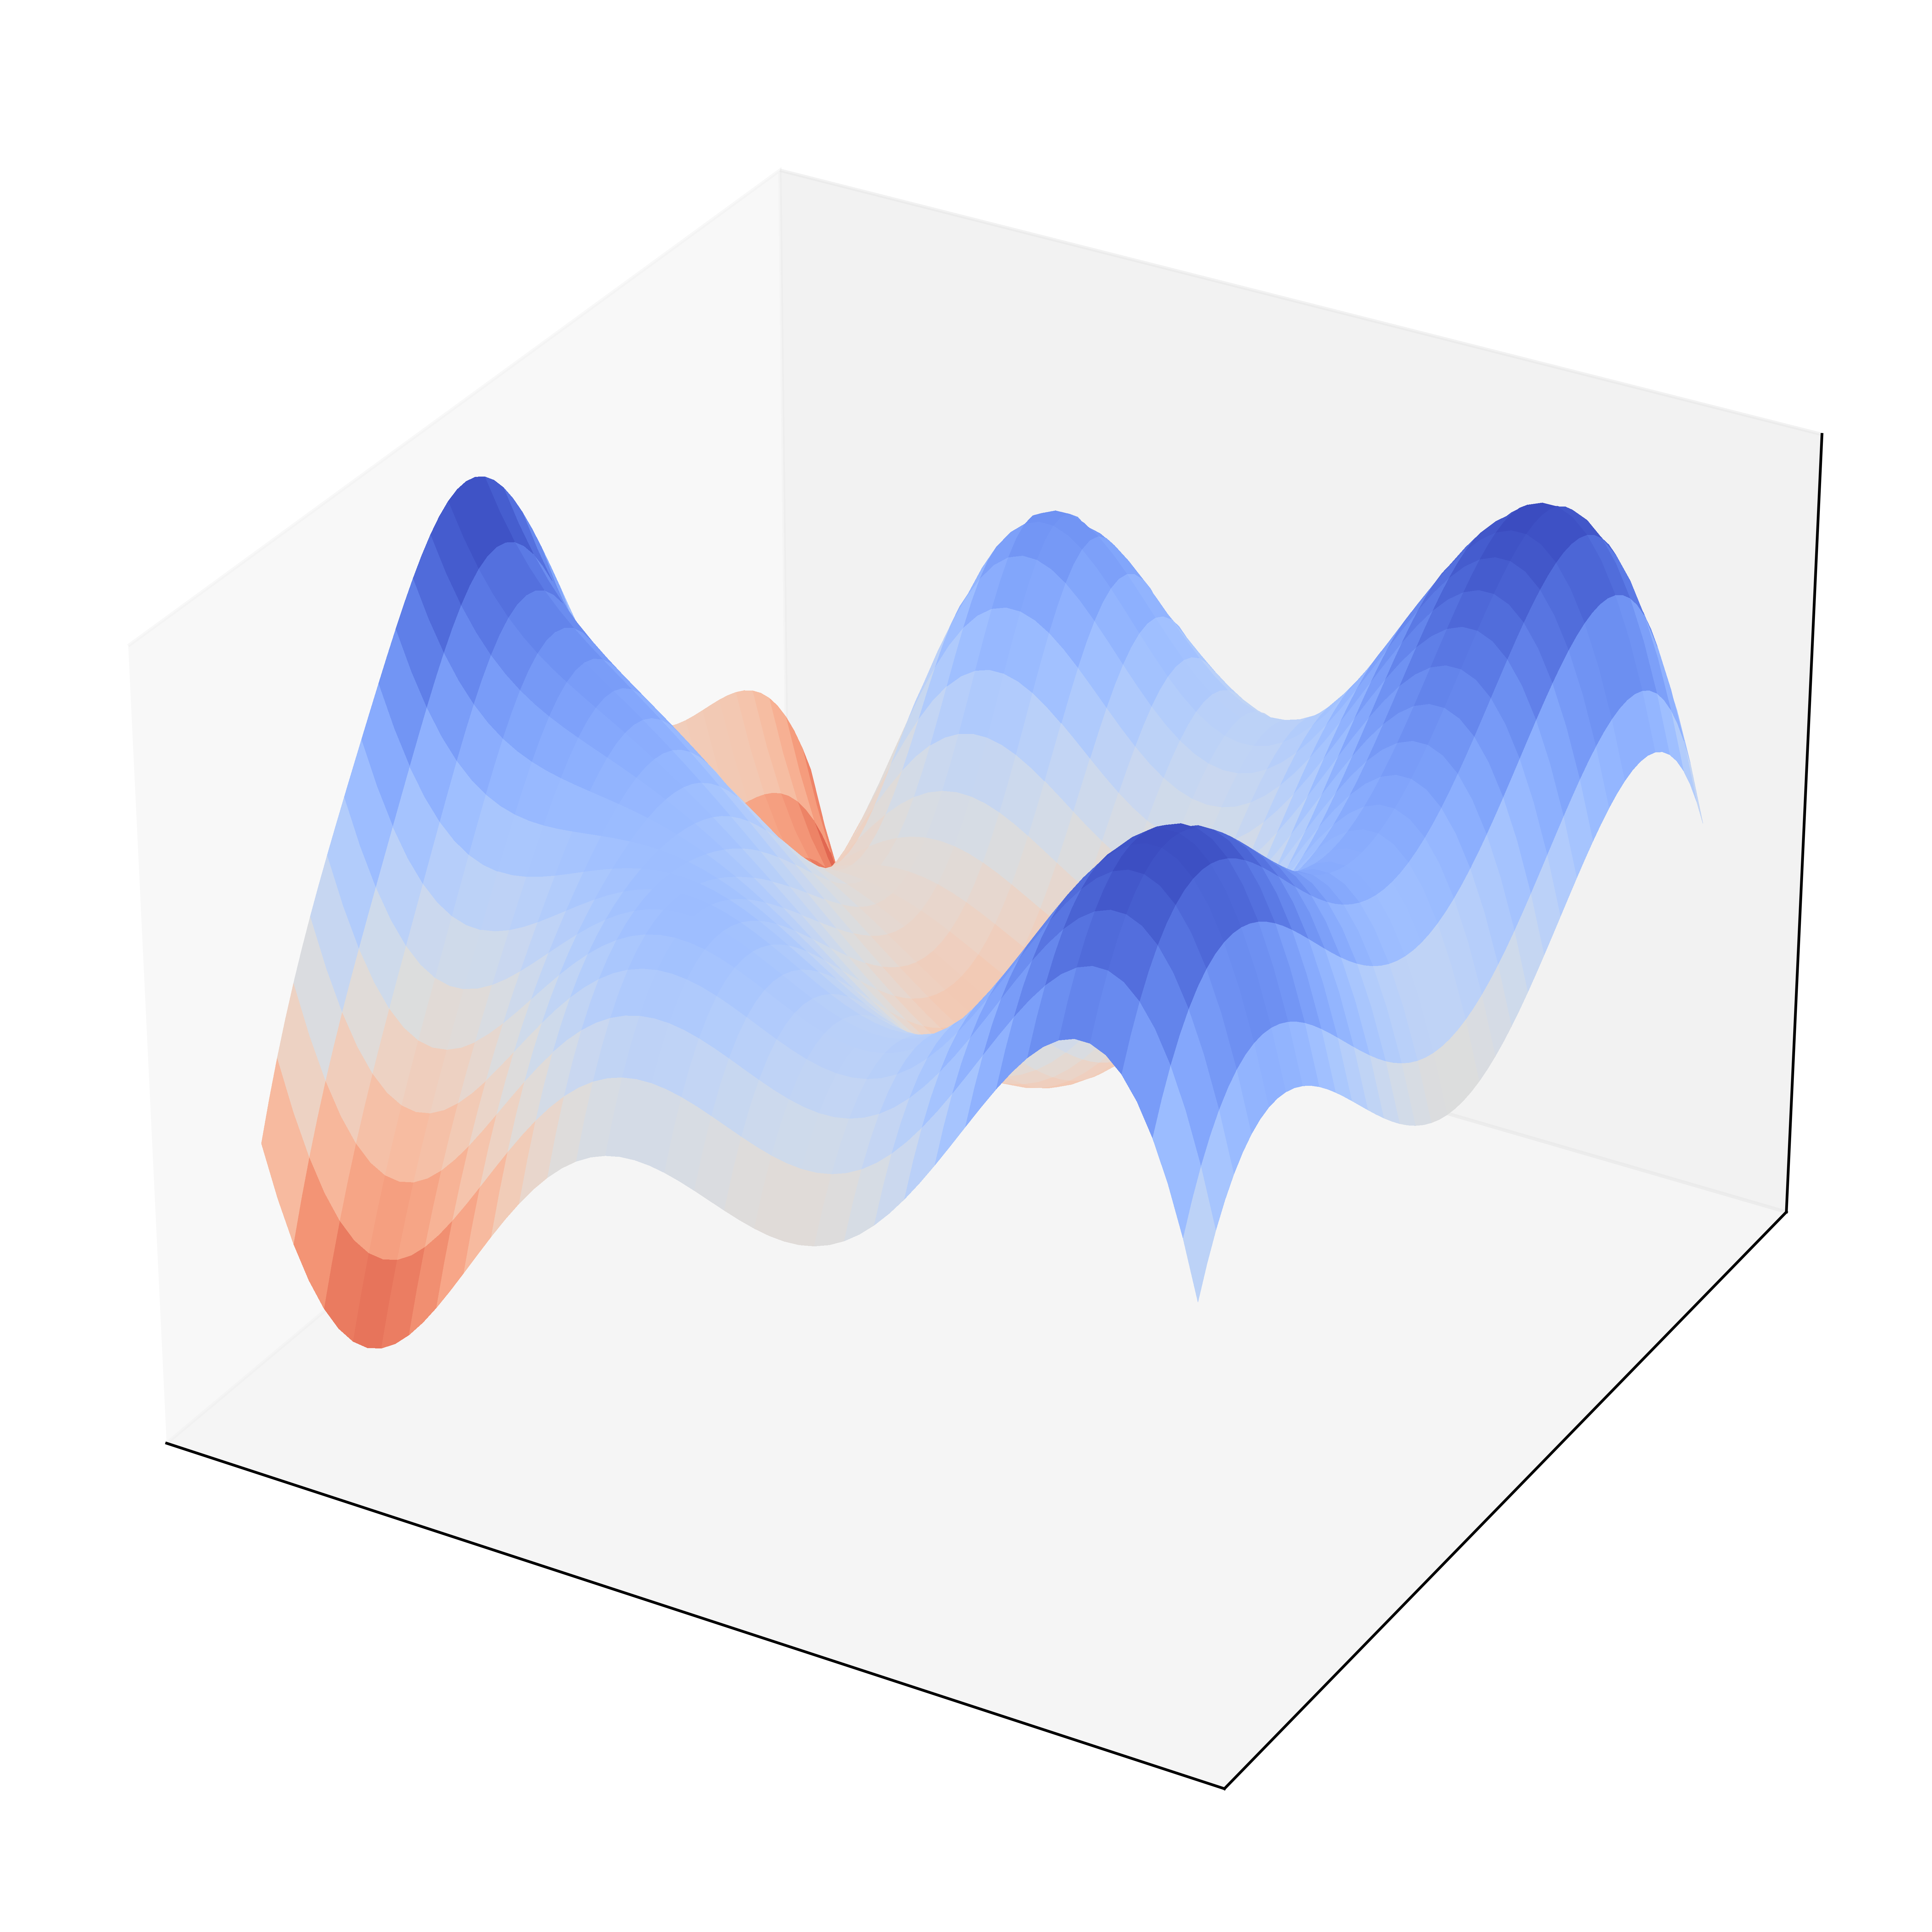

In [52]:
# Creating dataset
x = np.outer(np.linspace(-3, 3, 64), np.ones(64))
y = x.copy().T # transpose
xy = np.stack((x, y), -1)
z = np.zeros_like(x)
z += (x ** 2 * np.sin(x) + y ** 2 * np.cos(y / 2))
z += make_multivarate_normal(xy, [-2.5, -0.5], scale_to=8)
z += make_multivarate_normal(xy, [-1, 2], 0.5, scale_to=3)
z += make_multivarate_normal(xy, [-1.5, -2.5], 1.5, scale_to=1.5)


# z += - ( 2 * (x - 1) ** 2 + (y - 2) ** 2 ) / 8
# z += - (x + y + 2) ** 2 / 6
 
# Creating figure
fig = plt.figure(figsize =(10, 10), dpi=800)
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z, cmap=cm.coolwarm_r,
                       linewidth=0, antialiased=False)



ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# tmp_planes = ax.zaxis._PLANES 
# ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
#                      tmp_planes[0], tmp_planes[1], 
#                      tmp_planes[4], tmp_planes[5])


save_plot('energy_surface.pdf') 
# show plot

In [ ]:
np.stack((x, y), -1).shape

(500, 500, 3)


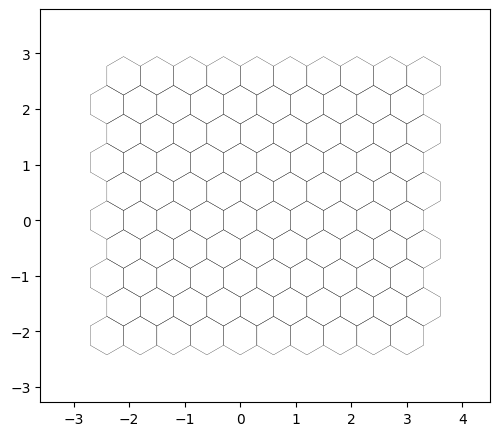

In [45]:
from hexalattice.hexalattice import *

centers, ax = create_hex_grid(10, 10, 0.6, do_plot=True)
canvas = ax.figure.canvas
canvas.draw()
image_flat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')  # (H * W * 3,)
# NOTE: reversed converts (W, H) from get_width_height to (H, W)
image = image_flat.reshape(*reversed(canvas.get_width_height()), 3)  # (H, W, 
print(image.shape)
# plt.show()

In [37]:
print(rv[1])

None
